<a href="https://colab.research.google.com/github/vibhutikathuria/covid-19-detector/blob/main/COVID_19_DETECTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://cb.lk/covid_19

--2021-01-13 04:50:50--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-01-13 04:50:51--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-01-13 04:50:52--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-01-13 04:50:52--  https://www.dropbox.com/s/raw/7

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Test"

In [ ]:
import numpy
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
#train fromscratch
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,    
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
)


Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator=test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
    
)

Found 60 images belonging to 2 classes.


In [ ]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 58s 10s/step - loss: 1.3662 - accuracy: 0.4562 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 55s 9s/step - loss: 0.6830 - accuracy: 0.5575 - val_loss: 0.6677 - val_accuracy: 0.8667
Epoch 3/10
6/6 [==============================] - 55s 9s/step - loss: 0.6251 - accuracy: 0.6664 - val_loss: 0.5465 - val_accuracy: 0.7333
Epoch 4/10
6/6 [==============================] - 55s 9s/step - loss: 0.5226 - accuracy: 0.7475 - val_loss: 0.4387 - val_accuracy: 0.9333
Epoch 5/10
6/6 [==============================] - 55s 9s/step - loss: 0.3540 - accuracy: 0.8846 - val_loss: 0.2623 - val_accuracy: 0.9333
Epoch 6/10
6/6 [==============================] - 55s 9s/step - loss: 0.3160 - accuracy: 0.8388 - val_loss: 0.2823 - val_accuracy: 0.9833
Epoch 7/10
6/6 [==============================] - 59s 10s/step - loss: 0.2868 - accuracy: 0.9000 - val_loss: 0.2156 - val_accuracy: 0.9833
Epoch 8/10
6/6 [================

In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1606442779302597, 0.9285714030265808]

In [ ]:
model.evaluate_generator(validation_generator)

[0.10933186113834381, 0.949999988079071]

In [ ]:
model=load_model('model_adv.h5')


In [ ]:
import os
import numpy as np

In [ ]:
d=train_generator.class_indices
d=dict([(v,k) for k,v in d.items()])
print(d)

{0: 'Covid', 1: 'Normal'}


Covid


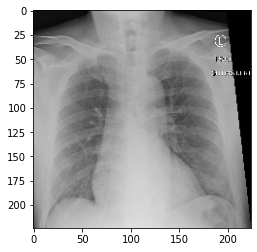

In [ ]:
import matplotlib.pyplot as plt
img=image.load_img("./CovidDataset/Val/Covid/16654_1_1.png",target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
p=model.predict(img)
img=image.load_img("./CovidDataset/Val/Covid/16654_1_1.png",target_size=(224,224))
img=image.img_to_array(img)
plt.imshow(img/255)
print(d[p[0,0]])


Normal


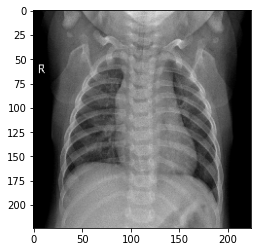

In [ ]:
import matplotlib.pyplot as plt
img2=image.load_img("./CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg",target_size=(224,224))
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)
p=model.predict(img2)
img2=image.load_img("./CovidDataset/Val/Normal/NORMAL2-IM-0395-0001.jpeg",target_size=(224,224))
img2=image.img_to_array(img2)
plt.imshow(img2/255)
print(d[p[0,0]])

In [ ]:
from sklearn.metrics import confusion_matrix
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
cm=confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns

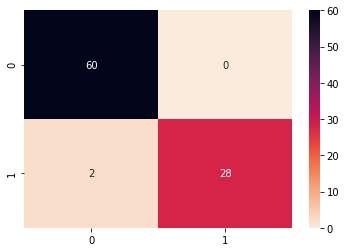

In [ ]:
sns.heatmap(cm,cmap="rocket_r",annot=True)